In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dir1 = "C:/Breast Cancer/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg"
dir1 = "content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg"
dir2 = "C:/Breast_Cancer/content/img/"


In [3]:
data = pd.read_csv("grouped_data.csv")
data

,Unnamed: 0,patient_id,left_or_right_breast,image_view,image_file_path,ROI_mask_file_path
0,0,P_00001,LEFT,CC,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.3...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
1,1,P_00001,LEFT,MLO,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.3...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
2,2,P_00004,LEFT,CC,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.8...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
3,3,P_00004,LEFT,MLO,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.2...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
4,4,P_00004,RIGHT,MLO,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.4...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
...,...,...,...,...,...,...
2414,2414,P_02566,RIGHT,MLO,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.2...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
2415,2415,P_02572,LEFT,CC,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.3...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
2416,2416,P_02572,LEFT,MLO,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.8...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...
2417,2417,P_02584,LEFT,CC,/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.1...,['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2...


In [4]:
for i in data.index:
    img_name = data["image_file_path"][i].split("/")[-1][:-4]
    f_img = dir2+str(i)+img_name+".jpg"
    mask_img = dir2+str(i)+img_name+"_mask.jpg"
    print(f_img)
    main_img = cv2.imread(data["image_file_path"][i][1:],cv2.IMREAD_GRAYSCALE)
    main_img = cv2.resize(main_img,(1000,2000))
    roi = []
    for index,j in enumerate(data["ROI_mask_file_path"][i].split(",")):
        if index == (len(data["ROI_mask_file_path"][i].split(","))-1):
            im = cv2.imread(str(j[3:-2]),cv2.IMREAD_GRAYSCALE)
        else:
            im = cv2.imread(str(j[3:-1]),cv2.IMREAD_GRAYSCALE)
        roi.append(im)
    imgs = roi[0]
    if(len(roi)>1):
        for j in range(1,len(roi)):
            imgs+=roi[j]
    imgs = cv2.resize(imgs,(1000,2000))
    cv2.imwrite(f_img,main_img)
    cv2.imwrite(mask_img,imgs)
    
    
    

C:/Breast_Cancer/content/img/01-211.jpg
C:/Breast_Cancer/content/img/11-207.jpg
C:/Breast_Cancer/content/img/21-250.jpg
C:/Breast_Cancer/content/img/31-067.jpg
C:/Breast_Cancer/content/img/41-056.jpg
C:/Breast_Cancer/content/img/51-188.jpg
C:/Breast_Cancer/content/img/61-189.jpg
C:/Breast_Cancer/content/img/71-190.jpg
C:/Breast_Cancer/content/img/81-191.jpg
C:/Breast_Cancer/content/img/91-192.jpg
C:/Breast_Cancer/content/img/101-193.jpg
C:/Breast_Cancer/content/img/111-194.jpg
C:/Breast_Cancer/content/img/121-195.jpg
C:/Breast_Cancer/content/img/131-275.jpg
C:/Breast_Cancer/content/img/141-104.jpg
C:/Breast_Cancer/content/img/151-196.jpg
C:/Breast_Cancer/content/img/161-197.jpg
C:/Breast_Cancer/content/img/171-198.jpg
C:/Breast_Cancer/content/img/181-199.jpg
C:/Breast_Cancer/content/img/191-200.jpg
C:/Breast_Cancer/content/img/201-201.jpg
C:/Breast_Cancer/content/img/211-203.jpg
C:/Breast_Cancer/content/img/221-204.jpg
C:/Breast_Cancer/content/img/231-205.jpg
C:/Breast_Cancer/content/i

In [30]:
main_img = cv2.imread(data["image_file_path"][0][1:],cv2.IMREAD_GRAYSCALE)
# cv2.imshow("image",main_img)
main_img = np.array(main_img)
main_img
# cv2.imshow("image",main_img)

array([[255, 255, 255, ..., 152, 150, 146],
       [255, 255, 255, ..., 147, 146, 143],
       [255, 255, 255, ..., 150, 147, 145],
       ...,
       [255, 255, 255, ..., 146, 144, 143],
       [255, 255, 255, ..., 161, 161, 162],
       [255, 255, 255, ..., 172, 174, 178]], dtype=uint8)

: 

['/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/2-111.jpg'
here
here
here end


ValueError: 'grayscale' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

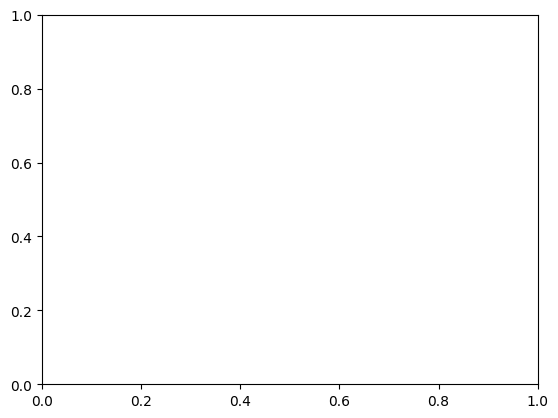

In [43]:
print(data["ROI_mask_file_path"][9].split(",")[0])
# roi = []
# for j in data["ROI_mask_file_path"][9]:
#     im = cv2.imread(j[1:],cv2.IMREAD_GRAYSCALE)
#     roi.append(im)
# imgs = roi[0]
# if(len(roi)>1):
#     for i in range(1,len(roi)):
#         imgs+=roi[i]
# plt.imshow(imgs)
roi = []
for index,j in enumerate(data["ROI_mask_file_path"][9].split(",")):
    if index == (len(data["ROI_mask_file_path"][9].split(","))-1):
        im = cv2.imread(str(j[3:-2]),cv2.IMREAD_GRAYSCALE)
        print("here end")
    else:
        print("here")
        im = cv2.imread(str(j[3:-1]),cv2.IMREAD_GRAYSCALE)
    roi.append(im)
imgs = roi[0]
if(len(roi)>1):
    for i in range(1,len(roi)):
        imgs+=roi[i]
plt.imshow(imgs)

In [47]:
img_name = data["image_file_path"][0].split("/")[-1]
img_name[:-4]

'1-211'